#### Example 1 ->

There are 80 students in a kindergarten class.
Each one of them has a 0.015 probability of forgetting their lunch on any given day.

(a) What is the average or expected number of students who forgot lunch in the class?  
(b) What is the probability that exactly 3 of them will forget their lunch today?

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import norm, poisson, binom
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rate = 80 * 0.015

In [4]:
rate # this is lambda

1.2

In [8]:
poisson.pmf(k = 3, mu = 1.2)

0.08674393303071422

In [9]:
# Let's try to model this as a Binomial Question

In [11]:
'''
P(Success) = Forgetting Lunch = 0.015
P(Failure) = 1 - P(Success) = 0.985


80 trials and 3 successes,

80C3 * [(0.015) ** 3] * [(1 - 0.015) ** 77]
'''

'\nP(Success) = Forgetting Lunch = 0.015\nP(Failure) = 1 - P(Success) = 0.985\n\n\n80 trials and 3 successes,\n\n80C3 * [(0.015) ** 3] * [(1 - 0.015) ** 77]\n'

In [13]:
binom.pmf(k = 3, n = 80, p = 0.015)

0.08660120920447566

In [14]:
'''
For Poisson and Binomial Approximation to be reasonable ->

    - The number of trials should be high
    - The probability of success should be low
    - Lambda = n*p (number of trials * probability of success)
'''

'\nFor Poisson and Binomial Approximation to be reasonable ->\n\n    - The number of trials should be high\n    - The probability of success should be low\n    - Lambda = n*p (number of trials * probability of success)\n'

# Exponential Distribution

In [15]:
from scipy.stats import expon, geom

#### Example 2 ->

You receive 240 messages per hour on average - assume Poisson distributed. Rate of messages arriving per second is 1/15.

1. Probability of having 0 messages in 10 seconds.
2. What is the probability of waiting for more than 10 seconds for the next message?
3. What is the probability of waiting less than or equal to 10 seconds?

In [16]:
rate = 10/15

In [17]:
poisson.pmf(k = 0, mu = 10/15)

0.513417119032592

In [20]:
scale = 1/(1/15)

In [21]:
scale

15.0

In [23]:
1 - expon.cdf(x = 10, scale = 15)

0.513417119032592

In [24]:
expon.cdf(x = 10, scale = 15)

0.486582880967408

### Poisson Distribution:

Use Case: Models the number of events in a fixed interval of time or space.

Example Question:

- "How many customers will enter a store in the next hour?"
- "How many messages will you receive in next 15 mins?"
- "How many calls can the call center expect in the next 30 minutes?"

Parameter: Rate (λ) represents the average number of events in the specified interval.



### Exponential Distribution:

Use Case: Models the time between consecutive events.

Example Question:

- "How long do I have to wait for the next message?"
- "On average, how much time will a customer spend waiting for service in a queue?"
- "How long, on average, will passengers wait between consecutive bus arrivals?"

Parameter: Scale represents the average time between events. It's the reciprocal of the rate.

Relation: Rate and Scale are reciprocals; as one increases, the other decreases.

#### Example 3 ->

You are working as a data engineer who has to resolve any bugs/
failures of machine learning models in production.
The time taken to debug is exponentially distributed with mean of 5 minutes.

1. Find the probability of debugging in 4 to 5 minutes.
2. Find the probability of needing more than 6 minutes to debug.
3. Given that you have already spent 3 minutes, what is the probability of needing more than 9 minutes total.

In [25]:
rate = 1 / 5
scale = 1 / rate

In [26]:
scale

5.0

In [27]:
# P[4 < T < 5] = P[T <= 5] - P[T <= 4]
prob1 = expon.cdf(x = 5, scale = 5) - expon.cdf(x = 4, scale = 5)

In [28]:
prob1

0.08144952294577923

In [30]:
# P[T > 6] = 1 - P[T <= 6]
prob2 = 1 - expon.cdf(x = 6, scale = 5)

In [31]:
prob2

0.3011942119122022

In [34]:
# P[T > 9 | T > 3] = (1 - P[T > 9]) / (1 - P[T > 3])
prob3 = (1 - expon.cdf(x = 9, scale = 5)) / (1 - expon.cdf(x = 3, scale = 5))

In [35]:
prob3

0.3011942119122021

#### Memoryless Property of Exponential Distribution - 
The memoryless property essentially means that the time you've already spent on an event doesn't affect the future waiting time.

In the context of the exponential distribution, it means that the probability of needing more time in the future is the same, regardless of how much time has already passed.

In [37]:
failure_rate = 1 / 50
time_interval = 20

prob = expon.cdf(x = time_interval, scale = 1 / failure_rate)

In [38]:
prob

0.3296799539643607

# Box Cox Transformation

In [39]:
from scipy.stats import boxcox

In [40]:
np.random.seed(0)

In [41]:
data = np.random.exponential(size = 1000)

File fox boxcox code -> https://colab.research.google.com/drive/111qkQaaH6QyT_t03nHqR_-pAqHR41HOz?usp=sharing

# GEOMETRIC DISTRIBUTION

Imagine, you're in a job search and you're giving interviews till you land your first job.

What are the possible outcomes? -> S or F

S = {s, fs, ffs, fffs....}
P = {0.1, 0.9 * 0.1, 0.9 * 0.9 * 0.1...}

Success Rate = p = 0.1
Failure Rate = 1 - p = 0.9

`P(X = k) = ((1 - p) ** (k-1)) * p`

In [53]:
x_vals = np.arange(1, 20)
p = 0.1

In [54]:
probs_geom = geom.pmf(x_vals, p = p)

In [55]:
probs_geom

array([0.1       , 0.09      , 0.081     , 0.0729    , 0.06561   ,
       0.059049  , 0.0531441 , 0.04782969, 0.04304672, 0.03874205,
       0.03486784, 0.03138106, 0.02824295, 0.02541866, 0.02287679,
       0.02058911, 0.0185302 , 0.01667718, 0.01500946])

<AxesSubplot:>

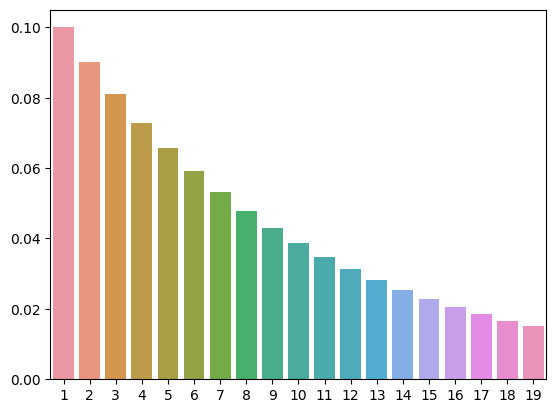

In [56]:
sns.barplot(x = x_vals, y = probs_geom)

In [59]:
# Geometric Distribution Mean
# Average number of attempts required to achieve success in a series of trials

In [58]:
'''
Mean = 1 / probability_of_success
'''

'\nMean = 1 / probability_of_success\n'

In [60]:
geom.pmf(k = 2, p = 0.3)

0.21

In [61]:
geom.pmf(k = 1, p = 0.05) + geom.pmf(k = 2, p = 0.05)

0.0975

In [62]:
geom.cdf(k = 2, p = 0.05)

0.0975